In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
class Material:
    def __init__(self, name, dir_name, tube_name, tube_directory, injected_mass = 1, mass_density = 1):
        self.name = name
        self.dir_name = dir_name
        self.tube_name = tube_name
        self.tube_dir = tube_directory
        self.data_was_set = False
        self.M = injected_mass
        self.rho = mass_density

    def set_data(self):
        file_names = [os.path.join(self.tube_dir, self.dir_name, file_name) for file_name in os.listdir(os.path.join(self.tube_dir, self.dir_name)) if file_name.endswith('.CSV')]
        column_names = ['TIME', 'CH1', 'CH2']
        runs = []
        for i, run in enumerate(file_names):
            runs.append(pd.read_csv(file_names[i], engine='python', usecols=column_names, on_bad_lines='skip'))
        self.times = [run['TIME'] for run in runs]
        self.CH1 = [run['CH1'] for run in runs]
        self.data_was_set = True

    @property
    def Qs(self):
        integration_results = []
        for idx, (time_val, ch1_series) in enumerate(zip(self.times, self.CH1)):
            integral =  - np.trapezoid(ch1_series, time_val) / 5 / 1000000
            integration_results.append(integral)
        return integration_results
    
    def plot_ch1(self, ax):
        ax.grid()
        ax.set_title(f'Oscilloscope data of {self.name} in {self.tube_name}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Voltage (V)')
        if self.data_was_set:
            for idx, (time_val, ch1_series) in enumerate(zip(self.times, self.CH1)):
                ax.plot(time_val, ch1_series, label=f'{self.tube_name} Run {idx+1}')

In [186]:
glass_tube_dir = "Glass Tube"
al_oxide_tube_dir = "Al Oxide Tube"

In [187]:
slg = Material('SLG', 'SLG', 'Glass Tube', glass_tube_dir)

In [188]:
slg.set_data()

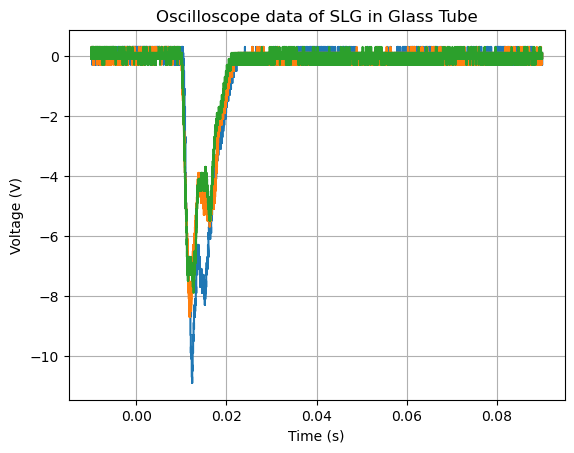

In [189]:
fig, ax = plt.subplots()
slg.plot_ch1(ax)

In [190]:
print(slg.Qs)

[np.float64(1.0929168000000002e-08), np.float64(9.466400000000007e-09), np.float64(8.327407999999995e-09)]
